# Caso 1: PCA_LDA_QDA

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [2]:
# Cargar el dataset
df = pd.read_csv("test.csv")

In [3]:
# Revisión inicial del dataset
pd.options.display.max_columns = None
df.head(7)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200,var_201,var_202,var_203,var_204,var_205,var_206,var_207,var_208,var_209,var_210
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,-23.5705,-4.5358,2.5531,5.8493,18.2675,2.1337,11.0656,7.7798,12.9536,9.4292,11.4327
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.657

- ID_code: Esta columna contiene identificadores únicos para cada fila, como test_0, test_1, etc. No aporta directamente información relevante para los análisis estadísticos o de aprendizaje automático porque solo sirve como una etiqueta. Por lo tanto, esta columna será descartada al procesar los datos.

- var_0, var_1, ..., var_210: Estas son las columnas de variables que contienen datos numéricos. Cada variable (o característica) representa un atributo distinto, y su significado específico depende del contexto del problema. Al haber 211 variables numéricas (de var_0 a var_210), se requiere analizar sus distribuciones, correlaciones y posibles valores atípicos para prepararlas adecuadamente para el análisis.

In [4]:
# Dimensiones del dataset
rows, columns = df.shape
print(f"Filas: {rows}, Columnas: {columns}")

Filas: 200000, Columnas: 212


## Análisis exploratorio de datos
Revisaremos el dataset para identificar y manejar valores nulos, columnas duplicadas y outliers. Además, se hará un análisis de la distribución de los datos que serán limpiados posteriormente.

In [5]:
# Estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200,var_201,var_202,var_203,var_204,var_205,var_206,var_207,var_208,var_209,var_210
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0

In [6]:
# Verificar valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Suma total de valores nulos en el DataFrame
total_nulos = df.isnull().sum().sum()
print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")

Valores nulos por columna:
ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_206    0
var_207    0
var_208    0
var_209    0
var_210    0
Length: 212, dtype: int64

Total de valores nulos en el DataFrame: 0


In [7]:
# Verificar columnas con los mismos valores en el mismo orden
duplicadas_valores = []

# Comparar cada columna con el resto
for i, col in enumerate(df.columns):
    for other_col in df.columns[i+1:]:
        if df[col].equals(df[other_col]):
            duplicadas_valores.append((col, other_col))

# Mostrar el resultado
if duplicadas_valores:
    print("Columnas con valores duplicados:")
    for dup in duplicadas_valores:
        print(f"{dup[0]} es idéntica a {dup[1]}")
else:
    print("No hay columnas con los mismos valores en el DataFrame.")

Columnas con valores duplicados:
var_0 es idéntica a var_206
var_1 es idéntica a var_207
var_2 es idéntica a var_208
var_3 es idéntica a var_209
var_4 es idéntica a var_210
var_6 es idéntica a var_203
var_7 es idéntica a var_204
var_8 es idéntica a var_205
var_166 es idéntica a var_202
var_180 es idéntica a var_201
var_187 es idéntica a var_200


In [8]:
# Verificar filas duplicadas
duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas en el DataFrame: {duplicados}")

Total de filas duplicadas en el DataFrame: 0


In [9]:
# Identificar outliers en cada columna usando el método IQR
outliers = {}

for col in df.columns[1:]:  # Excluye ID_code, asumiendo que no es numérica
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar cuántos valores están fuera del rango permitido
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outlier_count > 0:
        outliers[col] = outlier_count

# Mostrar resultados
if outliers:
    print("Columnas con outliers detectados:")
    for col, count in outliers.items():
        print(f"{col}: {count} outliers")
else:
    print("No se detectaron outliers en el DataFrame.")

Columnas con outliers detectados:
var_0: 122 outliers
var_1: 4 outliers
var_2: 56 outliers
var_3: 13 outliers
var_4: 89 outliers
var_6: 115 outliers
var_7: 15 outliers
var_10: 88 outliers
var_11: 356 outliers
var_12: 44 outliers
var_14: 4 outliers
var_15: 27 outliers
var_16: 90 outliers
var_17: 246 outliers
var_18: 9 outliers
var_19: 3 outliers
var_20: 1 outliers
var_21: 371 outliers
var_22: 271 outliers
var_23: 116 outliers
var_24: 3 outliers
var_25: 249 outliers
var_26: 162 outliers
var_27: 3 outliers
var_28: 193 outliers
var_29: 129 outliers
var_30: 5 outliers
var_31: 613 outliers
var_33: 10 outliers
var_34: 10 outliers
var_35: 196 outliers
var_36: 177 outliers
var_38: 508 outliers
var_39: 165 outliers
var_40: 35 outliers
var_42: 33 outliers
var_43: 13 outliers
var_44: 1190 outliers
var_45: 30 outliers
var_46: 263 outliers
var_47: 7 outliers
var_48: 108 outliers
var_49: 10 outliers
var_50: 197 outliers
var_51: 49 outliers
var_52: 331 outliers
var_53: 26 outliers
var_54: 37 outliers


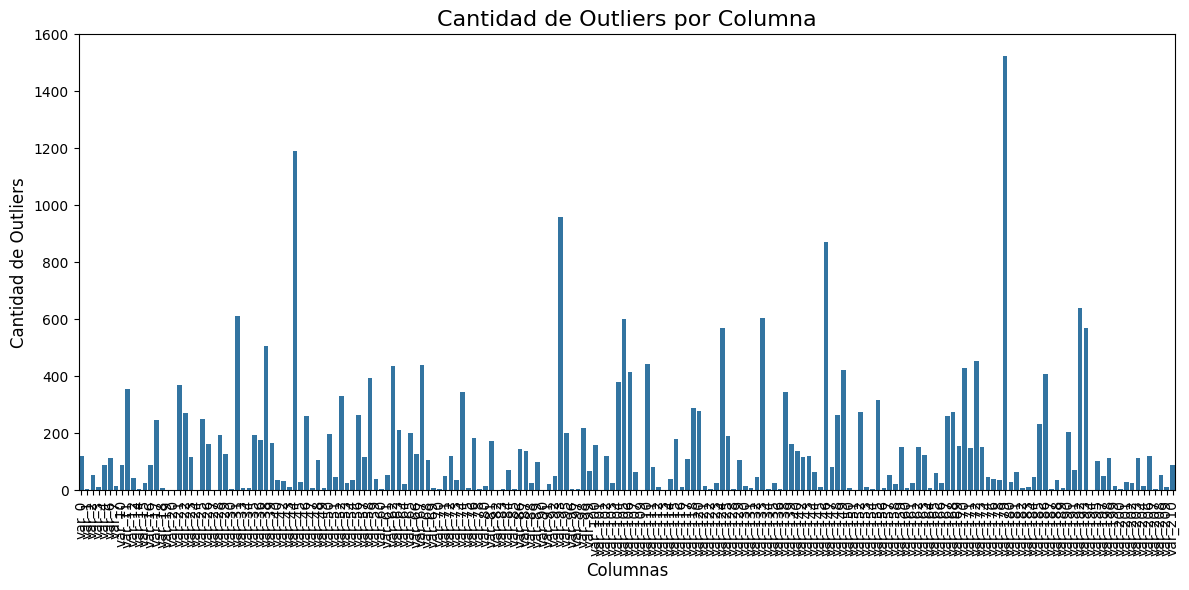

In [10]:
# Convertir el diccionario 'outliers' en un DataFrame
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Columna', 'Cantidad_Outliers'])

# Crear el gráfico de barras sin el parámetro 'palette'
plt.figure(figsize=(12, 6))
sns.barplot(x='Columna', y='Cantidad_Outliers', data=outliers_df)

# Personalizar el gráfico
plt.title('Cantidad de Outliers por Columna', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Cantidad de Outliers', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Limpieza y preprocesamiento de datos
En la limpieza y preprocesamiento de datos, eliminaremos columnas irrelevantes y duplicadas, además de manejar los outliers mediante el uso del rango intercuartílico para mantener solo los valores representativos.

In [11]:
# Eliminar la columna 'ID_code' del DataFrame por ser no relevante
df = df.drop(columns=['ID_code'])

# Verificar que la columna ha sido eliminada
print("Columnas después de eliminar 'ID_code':")
print(df.columns)

Columnas después de eliminar 'ID_code':
Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_201', 'var_202', 'var_203', 'var_204', 'var_205', 'var_206',
       'var_207', 'var_208', 'var_209', 'var_210'],
      dtype='object', length=211)


In [12]:
# Eliminar las columnas duplicadas identificadas
columns_to_drop = ['var_206', 'var_207', 'var_208', 'var_209', 'var_210', 
                   'var_203', 'var_204', 'var_205', 'var_202', 'var_201', 'var_200']

# Eliminar las columnas
df = df.drop(columns=columns_to_drop)

# Verificar que las columnas han sido eliminadas
print("Columnas después de eliminar las columnas duplicadas:")
print(df.columns)

Columnas después de eliminar las columnas duplicadas:
Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)


In [13]:
# Crear una copia del DataFrame para limpieza
df_cleaned = df.copy()

# Limpiar outliers usando el método IQR
for col in df_cleaned.columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Eliminar filas donde los valores estén fuera del rango permitido
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Verificar el resultado
print(f"Dimensiones del DataFrame original: {df.shape}")
print(f"Dimensiones del DataFrame después de limpiar outliers: {df_cleaned.shape}")

Dimensiones del DataFrame original: (200000, 200)
Dimensiones del DataFrame después de limpiar outliers: (174574, 200)


Visualización del dataset modificado

In [14]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame limpio:")
df_cleaned.head()

Primeras filas del DataFrame limpio:


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-6.1600,-5.6690,8.9094,

In [15]:
# Mostrar un resumen estadístico del DataFrame limpio
print("Resumen estadístico del DataFrame limpio:")
df_cleaned.describe()

Resumen estadístico del DataFrame limpio:


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.000000,174574.0000

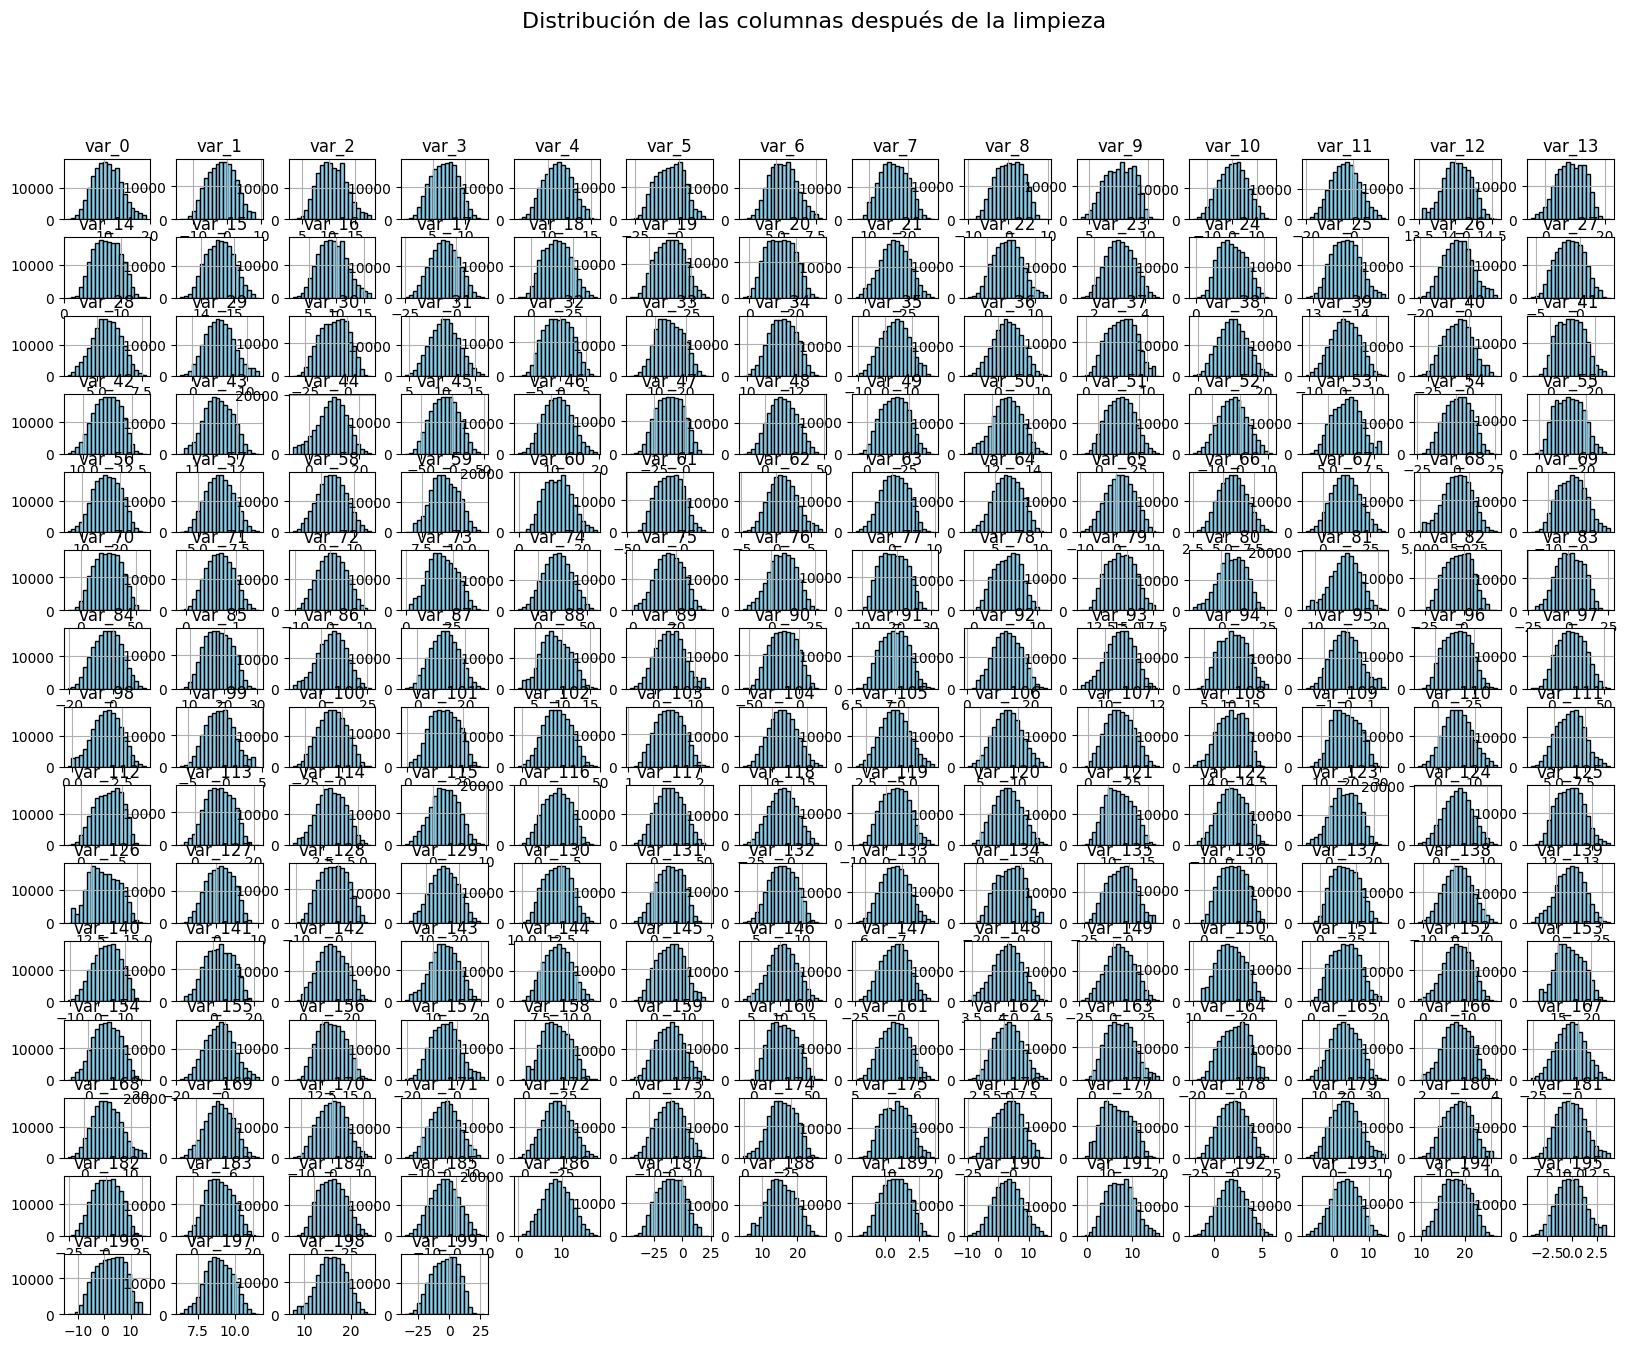

In [16]:
# Histograma para analizar la distribución después de la limpieza
df_cleaned.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de las columnas después de la limpieza", fontsize=16)
plt.show()

## Preparación de los datos
Seleccionamos las características (X). Luego, dividimos los datos en entrenamiento y prueba. Posteriormente, estandarizamos los datos para eliminar el sesgo de las escalas.

In [17]:
# Seleccionar solo las columnas numéricas para X
X = df_cleaned.select_dtypes(include=['number'])

# Verificar las dimensiones de X
print("Dimensiones de las características (X):", X.shape)

Dimensiones de las características (X): (174574, 200)


In [18]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)

Dimensiones de X_train: (139659, 200)
Dimensiones de X_test: (34915, 200)


In [19]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con los parámetros ajustados en los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Verificar las dimensiones
print("Dimensiones de X_train_scaled:", X_train_scaled.shape)
print("Dimensiones de X_test_scaled:", X_test_scaled.shape)

Dimensiones de X_train_scaled: (139659, 200)
Dimensiones de X_test_scaled: (34915, 200)


# Análisis de Componentes Principales (PCA)
Se aplicará el PCA con la finalidad de identificar los componentes principales en las que los datos varían más, permitiendo comprimir la información original en un espacio de menor dimensión.

## Elegir el número de dimensiones a reducir
El objetivo es determinar cuántas componentes principales explican la mayor parte de la varianza.

In [20]:
# Aplicar PCA al conjunto de entrenamiento escalado
pca = PCA()  # No se especifican componentes para calcular todos
pca.fit(X_train_scaled)

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Número de componentes para 85% de varianza explicada
n_components = np.argmax(cumulative_variance >= 0.85) + 1
print(f"Número óptimo de componentes principales: {n_components}")

Número óptimo de componentes principales: 169


In [21]:
# Reducir las dimensiones con PCA
pca_reducido = PCA(n_components=n_components)

# Ajustar y transformar los datos escalados
X_train_pca = pca_reducido.fit_transform(X_train_scaled)
X_test_pca = pca_reducido.transform(X_test_scaled)

# Verificar las dimensiones de los datos transformados
print("Dimensiones de X_train_pca:", X_train_pca.shape)
print("Dimensiones de X_test_pca:", X_test_pca.shape)

Dimensiones de X_train_pca: (139659, 169)
Dimensiones de X_test_pca: (34915, 169)


## Visualización de gráficos

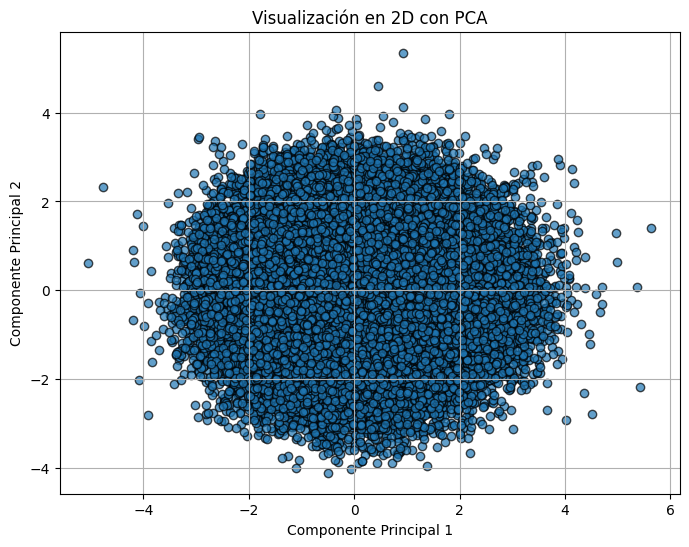

In [22]:
# Crear un DataFrame con los dos primeros componentes principales
pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['Componente 1', 'Componente 2'])

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Componente 1'], pca_df['Componente 2'], alpha=0.7, edgecolors='k')
plt.title('Visualización en 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

Los puntos están distribuidos de manera uniforme alrededor del origen (0,0). Esto sugiere que los datos son relativamente homogéneos y no contienen grandes diferencias en el espacio reducido a dos dimensiones.

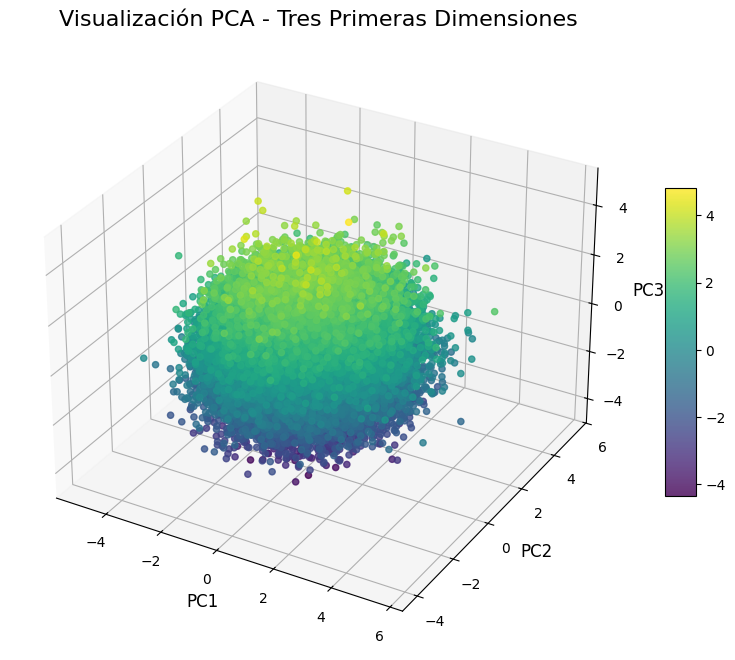

In [23]:
# Extraer las tres primeras componentes principales
Xax = X_train_pca[:, 0]  
Yax = X_train_pca[:, 1] 
Zax = X_train_pca[:, 2]  

# Crear una figura y un eje tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D, con el color basado en Zax
scatter = ax.scatter(Xax, Yax, Zax, c=Zax, cmap='viridis', alpha=0.8)

# Agregar barra de colores
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

# Etiquetas de los ejes
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_zlabel('PC3', fontsize=12)

# Título del gráfico
ax.set_title('Visualización PCA - Tres Primeras Dimensiones', fontsize=16)

# Mostrar el gráfico
plt.show()

En el gráfico, los puntos forman una nube esférica, lo que indica que las tres primeras componentes principales capturan de manera uniforme la varianza en varias direcciones.

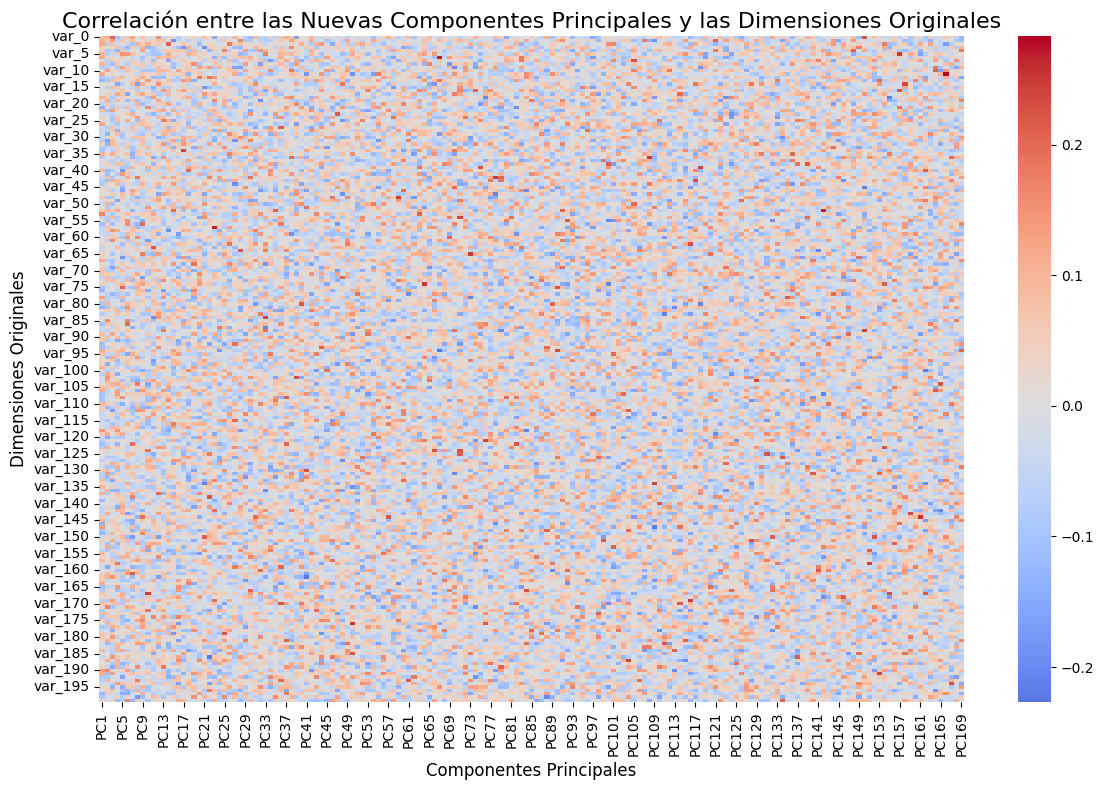

In [24]:
# Calcular las correlaciones entre las componentes principales y las dimensiones originales
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i+1}" for i in range(len(pca.components_))])

# Seleccionar solo las primeras 169 componentes principales
pca_components = pca_components.iloc[:169]

# Crear un mapa de calor de las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components.T, annot=False, cmap="coolwarm", cbar=True, center=0)

# Configurar el mapa de calor
plt.title("Correlación entre las Nuevas Componentes Principales y las Dimensiones Originales", fontsize=16)
plt.xlabel("Componentes Principales", fontsize=12)
plt.ylabel("Dimensiones Originales", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La gráfica representa una matriz de correlación entre las componentes principales (PCs) obtenidas del PCA y las dimensiones originales del conjunto de datos. Se observa que los valores son bastante bajos (en el rango de -0.2 a 0.2), esto sugiere que ninguna variable original domina o está fuertemente asociada con las primeras componentes principales. Esto implica que el PCA está distribuyendo la varianza de manera relativamente uniforme entre las dimensiones originales.

In [25]:
# Matriz de Componentes Principales Generada con PCA
components = pd.DataFrame(pca_reducido.components_, columns = X.columns)
components

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.073426,0.107641,0.120512,0.043990,0.035535,0.097061,0.117784,-0.005575,0.094713,-0.075557,0.015457,0.118718,-0.095366,-0.128310,0.007138,0.007242,0.009398,-0.009462,0.108338,0.031992,-0.051720,-0.142014,0.079039,-0.038347,0.053003,0.001501,0.125280,-0.043788,-0.049080,-0.026214,-0.051468,-0.080196,0.032932,-0.078423,-0.094116,0.103821,-0.075621,0.022434,-0.003752,-0.039696,0.093477,-0.012012,-0.042518,-0.072483,-0.077372,0.035682,0.009423,0.010058,0.062496,-0.016215,-0.041518,0.011717,0.048908,0.171851,-0.049280,0.015681,-0.109958,-0.054656,-0.052803,-0.038256,-0.016242,0.006613,0.026080,-0.048511,-0.035418,0.047507,0.037856,0.118132,0.022419,0.035656,0.078939,0.063404,-0.067727,0.022370,0.048142,-0.102308,-0.129963,-0.028536,0.127866,0.063975,-0.094507,-0.125824,0.037308,-0.076550,0.005687,-0.012480,-0.105465,-0.039886,-0.039117,0.082810,0.059547,0.071225,-0.109393,-0.107964,0.116785,0.078384,0.006642,0.023529,0.041458,0.094424,0.010480,-0.064963,0.003444,-0.034845,0.021368,0.082549,0.114791,-0.102473,-0.099044,-0.098134,0.090835,0.038088,0.057855,-0.052106,-0.028069,-0.043117,-0.030136,-0.009656,0.146481,0.057290,-0.042139,-0.073322,-0.108028,-0.080545,0.039925,0.013627,-0.006631,-0.072336,0.009841,-0.019122,0.059623,-0.058004,-0.069125,0.081175,0.024506,0.098085,-0.016802,0.105222,-0.009688,-0.122112,-0.003849,-0.040450,-0.047142,-0.048207,0.056713,0.100634,-0.136577,0.143355,-0.093815,-0.126349,-0.024733,0.048105,-0.027017,0.000067,-0.062510,0.093089,0.038456,0.093171,-0.011749,-0.022168,-0.007378,0.017277,0.062757,0.065102,0.122580,-0.107425,-0.079602,0.066761,0.030474,-0.072871,0.083754,0.016899,-0.091559,0.085900,-0.090200,0.058564,-0.000618,-0.092561,-0.031561,0.074449,0.065030,0.027575,-0.003755,-0.013595,0.091049,0.003641,-0.036765,0.018187,-0.005722,0.033216,0.133698,0.114759,-0.082789,-0.070879,-0.027523,0.033525,-0.005574,-0.126038,-0.088605,0.035465
1,0.105738,0.048639,-0.075146,0.002191,-0.092813,-0.074002,0.006015,-0.069071,-0.072609,-0.063499,0.131026,0.013411,-0.057725,-0.092751,0.020461,-0.067250,0.028532,0.048804,0.044583,0.113070,0.071205,0.026937,-0.109345,-0.024697,-0.006940,0.010044,-0.014827,-0.077419,-0.052128,-0.134265,0.025538,-0.159292,-0.131906,-0.040914,-0.001001,0.027810,-0.008375,-0.034434,0.050806,0.008264,-0.117913,-0.104709,0.072210,-0.110105,0.043440,-0.030171,0.051715,0.012687,-0.100624,0.039455,0.101457,-0.081355,0.088881,-0.044529,-0.065937,-0.089993,0.041943,0.077555,0.057616,-0.052075,0.040492,-0.067183,0.013397,-0.0059

El DataFrame components muestra qué tan fuerte contribuye cada variable original a cada componente principal. Si es un valor alto (positivo o negativo) indica que la variable original tiene una fuerte influencia en ese componente.

# Análisis Discriminante Lineal (LDA)
El Análisis Discriminante Lineal (LDA) es una técnica supervisada que encuentra combinaciones lineales de variables independientes para maximizar la separación entre clases (en este caso, clusters obtenidos por K-Means). Este análisis nos permitirá reducir dimensionalidad y visualizar cómo los datos se agrupan en un espacio de menor dimensión.

## Crear una variable objetivo artificial mediante clustering
Antes de aplicar LDA, generamos una variable objetivo artificial basada en el agrupamiento mediante K-Means. Determinaremos la cantidad óptima de clusters usando el Método del Codo para garantizar una representación adecuada de los datos.

Distortion for 1 clusters: 27931800.00000004
Distortion for 2 clusters: 27832858.701538123
Distortion for 3 clusters: 27765532.27558878
Distortion for 4 clusters: 27713942.33402988
Distortion for 5 clusters: 27671255.52906948
Distortion for 6 clusters: 27633870.476961605
Distortion for 7 clusters: 27601313.305540267
Distortion for 8 clusters: 27572246.71018342
Distortion for 9 clusters: 27547101.280453924


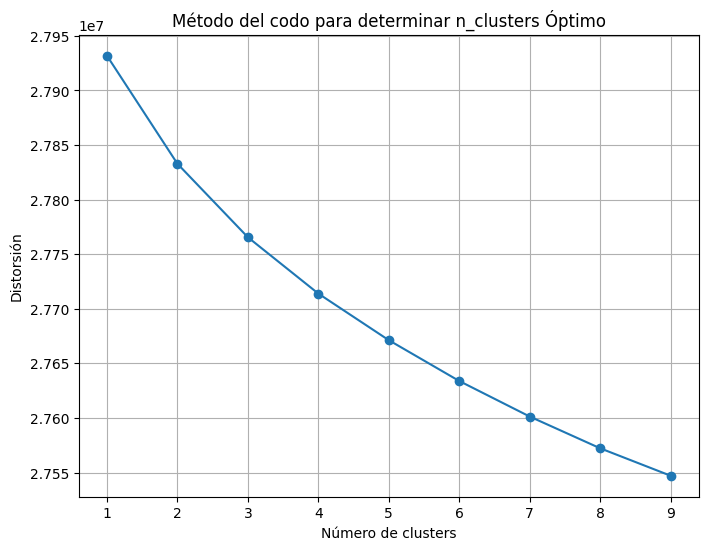

In [26]:
distorsions = []  # Lista para almacenar las distorsiones (inercia intra-cluster)
range_clusters = range(1, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia = kmeans.inertia_
    distorsions.append(inertia)
    print(f"Distortion for {k} clusters: {inertia}")

# Graficar la suma de los cuadrados intra-cluster (distorsions)
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, distorsions, marker='o')
plt.title("Método del codo para determinar n_clusters Óptimo")
plt.xlabel("Número de clusters")
plt.ylabel("Distorsión")
plt.grid(True)
plt.show()

Tras analizar las distorsiones (inercia intra-cluster) para diferentes valores de 𝑘, seleccionamos 𝑘=3 basándonos en el punto de inflexión observado en el gráfico. Por lo tanto, los datos serán agrupados en 3 clusters y estas etiquetas se usarán como la variable objetivo para LDA.

In [27]:
# Agrupamiento con K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Agregar los clusters como variable objetivo
print("Etiquetas de clusters asignadas:", np.unique(clusters))

Etiquetas de clusters asignadas: [0 1 2]


Con los clusters como variable objetivo, ajustamos un modelo LDA para reducir la dimensionalidad y visualizar la separación entre clusters.

In [28]:
# Crear objeto LDA con el número de componentes basado en los clusters
n_components_lda = min(len(np.unique(clusters)) - 1, X_train_scaled.shape[1])
lda = LDA(n_components=n_components_lda)

# Ajustar LDA al conjunto de entrenamiento
X_train_lda = lda.fit_transform(X_train_scaled, clusters)

# Transformar los datos de prueba
X_test_lda = lda.transform(X_test_scaled)

# Imprimir las dimensiones transformadas
print("Dimensiones de X_train_lda:", X_train_lda.shape)
print("Dimensiones de X_test_lda:", X_test_lda.shape)

Dimensiones de X_train_lda: (139659, 2)
Dimensiones de X_test_lda: (34915, 2)


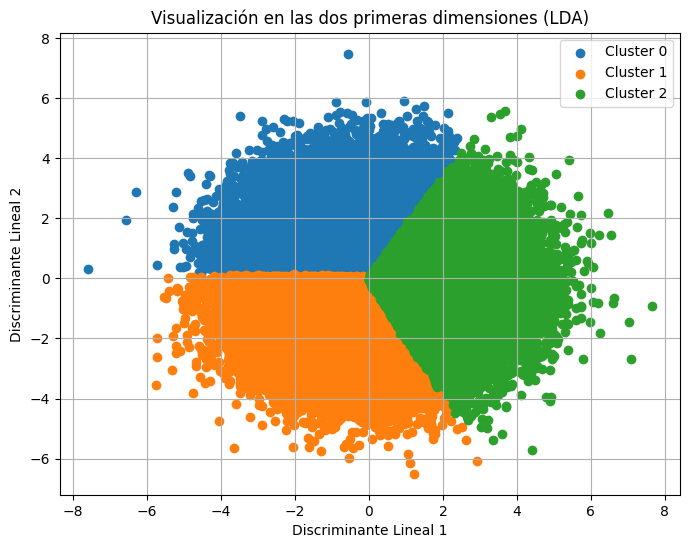

In [29]:
# Visualizar los datos en las dos primeras dimensiones de LDA
plt.figure(figsize=(8, 6))

# Usamos diferentes colores para cada clase (cluster)
for cluster in np.unique(clusters):
    plt.scatter(
        X_train_lda[clusters == cluster, 0],
        X_train_lda[clusters == cluster, 1],
        label=f"Cluster {cluster}"
    )

# Personalizar el gráfico
plt.title("Visualización en las dos primeras dimensiones (LDA)")
plt.xlabel("Discriminante Lineal 1")
plt.ylabel("Discriminante Lineal 2")
plt.legend()
plt.grid()
plt.show()

El gráfico muestra una clara separación entre las tres clases en el espacio reducido por LDA, lo que indica una buena discriminación entre ellas. La disposición de los puntos sugiere que las clases están bien diferenciadas y agrupadas en regiones distintas.

## Entrenar un modelo basado en LDA
Para evaluar el poder predictivo de LDA, se utilizan las dimensiones generadas por esta técnica para entrenar un clasificador logístico. Este modelo supervisado tiene como objetivo predecir las etiquetas de los clusters y comprobar qué tan bien se alinean las predicciones con las etiquetas reales, midiendo así la eficacia de la reducción de dimensionalidad proporcionada por LDA.

In [30]:
# Instanciar y ajustar el clasificador
lda_classifier = LogisticRegression(random_state=42)  
lda_classifier.fit(X_train_lda, clusters)

# Realizar predicciones sobre los datos transformados de prueba
y_pred_lda = lda_classifier.predict(X_test_lda)

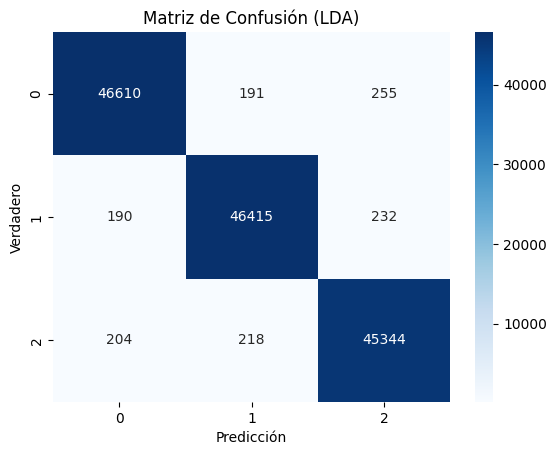

In [31]:
# Matriz de confusión
cm = confusion_matrix(clusters, lda_classifier.predict(X_train_lda))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (LDA)")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

La matriz de confusión refleja un excelente desempeño del modelo LDA, la mayoría de las predicciones son correctas para las tres clases (0, 1 y 2), con muy pocas instancias clasificadas incorrectamente. Este resultado destaca la efectividad del modelo al discriminar entre las clases en un espacio reducido, manteniendo una alta precisión en la asignación de etiquetas.

In [32]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(clusters, lda_classifier.predict(X_train_lda))
print(f"Exactitud del modelo basado en LDA: {accuracy:.2f}")

Exactitud del modelo basado en LDA: 0.99


In [33]:
# Generar el reporte de clasificación
print("Reporte de clasificación basado en LDA:")
print(classification_report(clusters, lda_classifier.predict(X_train_lda)))

Reporte de clasificación basado en LDA:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     47056
           1       0.99      0.99      0.99     46837
           2       0.99      0.99      0.99     45766

    accuracy                           0.99    139659
   macro avg       0.99      0.99      0.99    139659
weighted avg       0.99      0.99      0.99    139659



El reporte muestra una precisión, recall y F1-score de 0.99 para cada clase, destacando un desempeño sobresaliente en términos de separación lineal entre clusters. La exactitud global del 99% confirma la capacidad del modelo LDA para capturar y representar adecuadamente las diferencias entre clases en un espacio de menor dimensión.

# Análisis Discriminante Cuadrático (QDA)
El Análisis Discriminante Cuadrático (QDA) es un modelo de clasificación supervisado que se basa en la teoría de la probabilidad. Asume que las características siguen distribuciones normales multivariadas, permitiendo una mayor flexibilidad al modelar datos con varianzas y covarianzas diferentes para cada clase. Esto lo hace adecuado para problemas donde las relaciones entre las clases no son lineales, lo que lo diferencia de métodos como LDA (Análisis Discriminante Lineal), que asume varianzas iguales.

## Entrenamiento de un modelo basado en QDA
El modelo QDA se entrena utilizando el conjunto de datos escalado X_train_scaled y las etiquetas clusters. Este proceso ajusta los parámetros de distribución para cada clase (medias, varianzas y covarianzas), permitiendo que el modelo identifique patrones únicos de cada grupo. Posteriormente, se realizan predicciones sobre el conjunto de prueba X_test_scaled para evaluar el rendimiento del modelo.

In [34]:
# Entrenar el modelo QDA con clusters como etiquetas
qda = QDA()
qda.fit(X_train_scaled, clusters)

# Realizar predicciones
y_pred_qda = qda.predict(X_test_scaled)

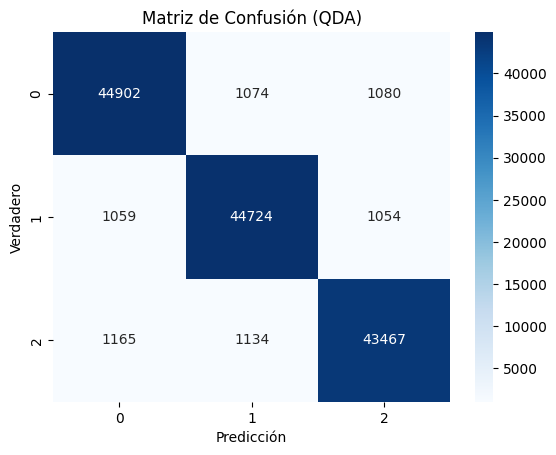

In [35]:
# Matriz de confusión
cm = confusion_matrix(clusters, qda.predict(X_train_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (QDA)")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

La matriz de confusión revela un alto nivel de precisión en la clasificación de las tres clases (0, 1, 2). Aunque existen algunos errores de clasificación entre clases vecinas, la mayoría de los elementos se encuentran correctamente identificados dentro de su categoría respectiva, lo que refleja la capacidad del modelo para distinguir entre las clases.

In [36]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(clusters, qda.predict(X_train_scaled))
print(f"Exactitud del modelo basado en QDA: {accuracy:.2f}")

Exactitud del modelo basado en QDA: 0.95


In [37]:
# Generar el reporte de clasificación
print("Reporte de clasificación basado en QDA:")
print(classification_report(clusters, qda.predict(X_train_scaled)))

Reporte de clasificación basado en QDA:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     47056
           1       0.95      0.95      0.95     46837
           2       0.95      0.95      0.95     45766

    accuracy                           0.95    139659
   macro avg       0.95      0.95      0.95    139659
weighted avg       0.95      0.95      0.95    139659



El reporte muestra una precisión, recall y F1-score de 0.95 para cada clase, indicando un desempeño consistente en términos de clasificación correcta, recuperación de instancias relevantes y balance entre estas métricas. La exactitud global del 95% confirma la efectividad del modelo en un conjunto de datos con alta dimensionalidad, destacando su capacidad para capturar patrones no lineales.